In [2]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Texas Population 

In [3]:
texas=pd.read_csv('CSV Files/TWFC CSV/Population.csv')
# clean un needed data 
for i in texas.columns:
    if len(texas[i].unique()) ==1:
        texas=texas.drop(i, axis=1)

texas['Population'] = texas['Population'].str.replace(',', '')
texas['Population'] = texas['Population'].astype(int)
        

In [4]:
population_m=round(texas.set_index('Year').sort_index()/1000000, 3)

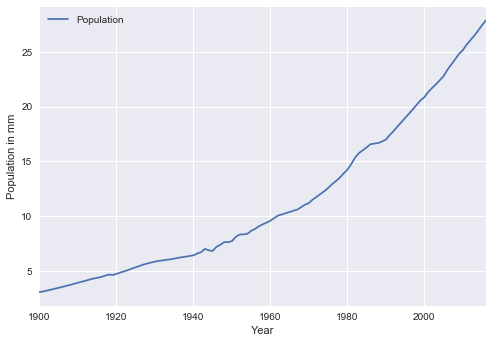

In [5]:
population_m.plot()
plt.ylabel('Population in mm')
plt.savefig('Population')
plt.show()

## Income 

In [6]:
income=pd.read_csv('CSV Files/TWFC CSV/Income.csv')

In [7]:
income.head()

,Year,Period,Area,Income Source,Income Type,Income
0,2015,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$41,732"
1,2014,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$41,330"
2,2013,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$38,831"
3,2012,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$37,769"
4,2011,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,"$36,013"


In [8]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
Year             450 non-null int64
Period           450 non-null object
Area             450 non-null object
Income Source    450 non-null object
Income Type      450 non-null object
Income           450 non-null object
dtypes: int64(1), object(5)
memory usage: 21.2+ KB


In [9]:
income['Income'] = income['Income'].str.replace(',', '')
income['Income'] = income['Income'].str.replace('$', '')
income['Income'] = income['Income'].astype(int)

In [10]:
income.head()

,Year,Period,Area,Income Source,Income Type,Income
0,2015,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,41732
1,2014,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,41330
2,2013,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,38831
3,2012,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,37769
4,2011,Annual,Abilene MSA,BEA,Per Capita Personal Income - BEA,36013


In [11]:
# clean un needed data 
for i in income.columns:
    if len(income[i].unique()) ==1:
        income=income.drop(i, axis=1)

In [12]:
income.head()

,Year,Area,Income
0,2015,Abilene MSA,41732
1,2014,Abilene MSA,41330
2,2013,Abilene MSA,38831
3,2012,Abilene MSA,37769
4,2011,Abilene MSA,36013


In [13]:
#pivot 
income=income.pivot(index='Year', columns='Area', values='Income')

In [14]:
income

Area,Abilene MSA,Amarillo MSA,Austin-Round Rock MSA,Beaumont-Port Arthur MSA,Brownsville-Harlingen MSA,College Station-Bryan MSA,Corpus Christi MSA,Dallas-Fort Worth-Arlington MSA,El Paso MSA,Houston-The Woodlands-Sugar Land MSA,...,Midland MSA,Odessa MSA,San Angelo MSA,San Antonio-New Braunfels MSA,Sherman-Denison MSA,Texarkana MSA,Tyler MSA,Victoria MSA,Waco MSA,Wichita Falls MSA
Year,,,,,,,,,,,,,,,,,,,,,
1998,21816,22874,29234,22388,14219,18367,21994,30222,17657,30007,...,29515,20230,22564,23863,21271,20426,24524,23692,20996,22696
1999,22439,23141,31513,22142,14469,19017,22587,31196,17954,30804,...,28729,19361,23090,24871,21938,21219,25192,24253,21857,23562
2000,22917,23950,32908,23370,15315,20034,23551,33701,18975,33219,...,32305,21216,24147,26803,23402,22284,27139,26320,22494,24601
2001,23643,25774,34530,24356,16691,21204,25317,34741,19408,34122,...,48752,22749,26628,27614,23986,23673,28149,27956,23306,26510
2002,24591,26409,33259,24624,17457,21580,25772,34385,20274,33035,...,48358,23020,27141,27917,24272,24178,28533,28099,23951,27436
2003,26051,27404,33254,25408,17955,22829,27059,34335,20825,33711,...,52179,23355,28314,28981,25161,24660,29464,28489,25253,28530
2004,26909,27756,33347,25691,18086,23389,27909,34618,21586,35518,...,53051,23634,28644,29683,25944,26063,30753,29397,25670,28531
2005,28243,29881,35769,27282,18725,24372,29489,37363,22673,38496,...,60028,25867,30672,31329,27231,27020,33944,31716,26971,30250
2006,29840,31326,38086,29732,19635,25745,31327,39881,23503,41575,...,63297,29461,31915,33218,28995,27986,36130,34564,27966,33466


## Annual Income(Mean) per area() 

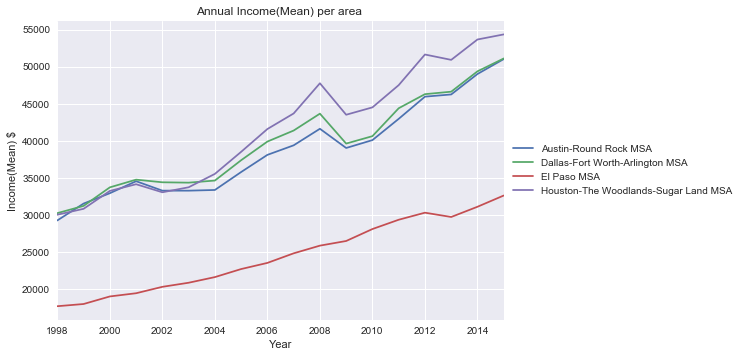

In [18]:
select=['Austin-Round Rock MSA', 'Dallas-Fort Worth-Arlington MSA', 'El Paso MSA', 'Houston-The Woodlands-Sugar Land MSA']

ax=income[select].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Income(Mean) $')
plt.title('Annual Income(Mean) per area ')
plt.savefig('Annual_income')
plt.show()

In [19]:
income_pct=round(income.pct_change()*100,1)
income_pct=income_pct.iloc[1:]
income_pct.head()

Area,Abilene MSA,Amarillo MSA,Austin-Round Rock MSA,Beaumont-Port Arthur MSA,Brownsville-Harlingen MSA,College Station-Bryan MSA,Corpus Christi MSA,Dallas-Fort Worth-Arlington MSA,El Paso MSA,Houston-The Woodlands-Sugar Land MSA,...,Midland MSA,Odessa MSA,San Angelo MSA,San Antonio-New Braunfels MSA,Sherman-Denison MSA,Texarkana MSA,Tyler MSA,Victoria MSA,Waco MSA,Wichita Falls MSA
Year,,,,,,,,,,,,,,,,,,,,,
1999,2.9,1.2,7.8,-1.1,1.8,3.5,2.7,3.2,1.7,2.7,...,-2.7,-4.3,2.3,4.2,3.1,3.9,2.7,2.4,4.1,3.8
2000,2.1,3.5,4.4,5.5,5.8,5.3,4.3,8.0,5.7,7.8,...,12.4,9.6,4.6,7.8,6.7,5.0,7.7,8.5,2.9,4.4
2001,3.2,7.6,4.9,4.2,9.0,5.8,7.5,3.1,2.3,2.7,...,50.9,7.2,10.3,3.0,2.5,6.2,3.7,6.2,3.6,7.8
2002,4.0,2.5,-3.7,1.1,4.6,1.8,1.8,-1.0,4.5,-3.2,...,-0.8,1.2,1.9,1.1,1.2,2.1,1.4,0.5,2.8,3.5
2003,5.9,3.8,-0.0,3.2,2.9,5.8,5.0,-0.1,2.7,2.0,...,7.9,1.5,4.3,3.8,3.7,2.0,3.3,1.4,5.4,4.0


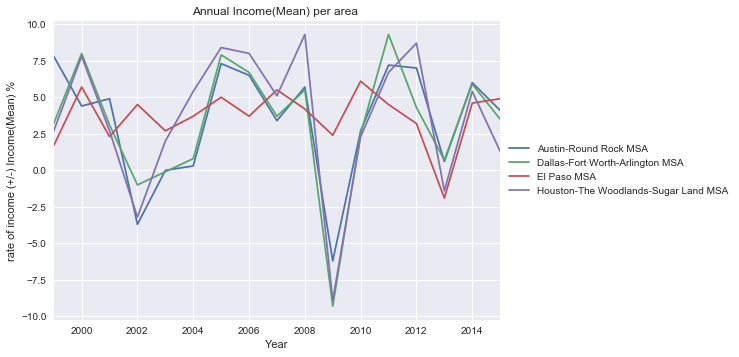

In [20]:
ax=income_pct[select].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('rate of income (+/-) Income(Mean) %')
plt.title('Annual Income(Mean) per area ')
plt.savefig('Anuual Income Change%')
plt.show()

In [21]:
select=['Austin-Round Rock MSA', 'Dallas-Fort Worth-Arlington MSA', 'El Paso MSA', 'Houston-The Woodlands-Sugar Land MSA']
income=income[select]
income.columns=['Austin', 'Dallas', 'El Paso', 'Houston']

In [22]:
income

,Austin,Dallas,El Paso,Houston
Year,,,,
1998,29234,30222,17657,30007
1999,31513,31196,17954,30804
2000,32908,33701,18975,33219
2001,34530,34741,19408,34122
2002,33259,34385,20274,33035
2003,33254,34335,20825,33711
2004,33347,34618,21586,35518
2005,35769,37363,22673,38496
2006,38086,39881,23503,41575


# Employment Dataset 

In [23]:
files = os.listdir(path='CSV Files/TWFC CSV/')

In [24]:
files.remove('Population.csv')
files.remove('Income.csv')

In [25]:
empdata=[]
for file in files:
    path=f'CSV Files/TWFC CSV/{file}'
    df = pd.read_csv(path)
    col=df.columns[-1]
    col_type=type(df[col].iloc[0])

    if col_type == str: 
        col=df.columns[-1]
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].astype(int)
    
    for i in df.columns:
        if len(df[i].unique()) ==1:
            df=df.drop(i, axis=1)
    empdata.append(df)
    print(f'data frame: {file} added to list')
    
cols=['Year', 'Period ID', 'Period', 'Area']    
df1=pd.merge(empdata[0], empdata[1], on=cols)
df2=pd.merge(empdata[2], empdata[3], on=cols)
TexasWFC=pd.merge(df1, df2, on=cols)

TexasWFC.head()
    

data frame: Employment.csv added to list
data frame: Laborforce.csv added to list
data frame: Un_numbers.csv added to list
data frame: Un_rate.csv added to list


,Year,Period ID,Period,Area,Employment,Labor Force,Unemployment,Unemployment Rate
0,2017,1,Jan,Abilene MSA,71281,74325,3044,4.1
1,2017,2,Feb,Abilene MSA,71645,74869,3224,4.3
2,2017,3,Mar,Abilene MSA,71935,75149,3214,4.3
3,2017,4,Apr,Abilene MSA,72095,75250,3155,4.2
4,2017,5,May,Abilene MSA,71677,74771,3094,4.1


In [26]:
TexasWFC_data=TexasWFC.columns.tolist()[-4:]

In [27]:
TexasWFC_means=TexasWFC.groupby(['Area', 'Year'])[TexasWFC_data].mean()
TexasWFC_means.head()

Employment   Labor Force  Unemployment  Unemployment Rate
Area        Year                                                             
Abilene MSA 1990  64531.416667  68584.166667   4052.750000           5.916667
            1991  65709.333333  69377.416667   3668.083333           5.283333
            1992  67167.250000  71074.333333   3907.083333           5.491667
            1993  68869.916667  72771.000000   3901.083333           5.350000
            1994  70369.500000  73999.500000   3630.000000           4.908333

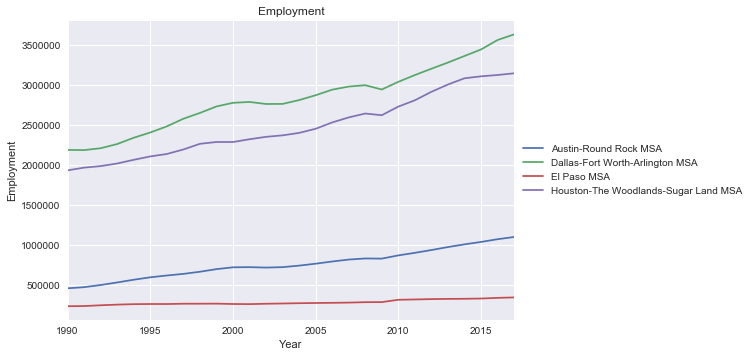

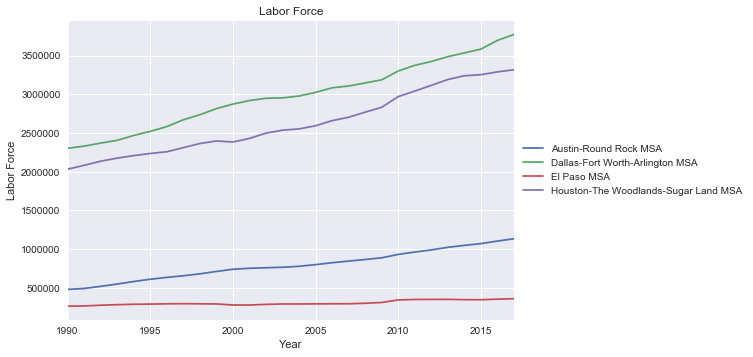

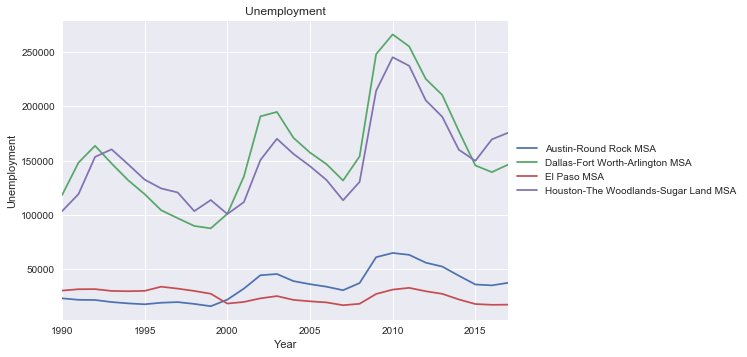

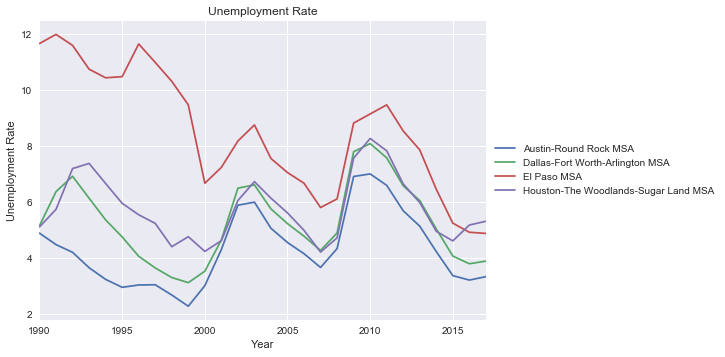

In [29]:
#select=['Austin-Round Rock MSA',  'Houston-The Woodlands-Sugar Land MSA',  'Dallas-Fort Worth-Arlington MSA', 'Amarillo MSA', 'San Antonio-New Braunfels MSA']
for data in TexasWFC_data:
    TexasWFC_plot=TexasWFC_means.reset_index()
    #TexasWFC_plot=TexasWFC_plot[data]
    data_df=TexasWFC_plot.pivot(index='Year', columns='Area', values=data)
    data_df=data_df[select]
    ax=data_df.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel(f'{data}')
    plt.title(f'{data}')
    plt.savefig(f'TexasWFC {data}')
    plt.show()

In [30]:
TexasWFC_means_change=round(TexasWFC_means.pct_change()*100,1).iloc[1:]
TexasWFC_means_change.head()


Employment  Labor Force  Unemployment  Unemployment Rate
Area        Year                                                          
Abilene MSA 1991         1.8          1.2          -9.5              -10.7
            1992         2.2          2.4           6.5                3.9
            1993         2.5          2.4          -0.2               -2.6
            1994         2.2          1.7          -6.9               -8.3
            1995         3.1          3.0           1.4               -1.9

In [31]:
TexasWFC_plot=TexasWFC_means_change.reset_index()
TexasWFC_plot[TexasWFC_plot.Year>1996]


,Area,Year,Employment,Labor Force,Unemployment,Unemployment Rate
6,Abilene MSA,1997,0.3,-0.5,-17.0,-16.6
7,Abilene MSA,1998,0.5,0.3,-5.4,-5.6
8,Abilene MSA,1999,-1.5,-1.3,2.5,3.9
9,Abilene MSA,2000,-0.9,-0.5,8.5,8.8
10,Abilene MSA,2001,-0.5,-0.1,8.1,8.5
11,Abilene MSA,2002,2.5,3.1,17.8,13.9
12,Abilene MSA,2003,2.1,2.4,7.1,4.9
13,Abilene MSA,2004,0.7,0.0,-12.3,-12.4
14,Abilene MSA,2005,1.1,0.7,-8.8,-9.5
15,Abilene MSA,2006,1.9,1.6,-4.0,-5.3


# Change Plots 

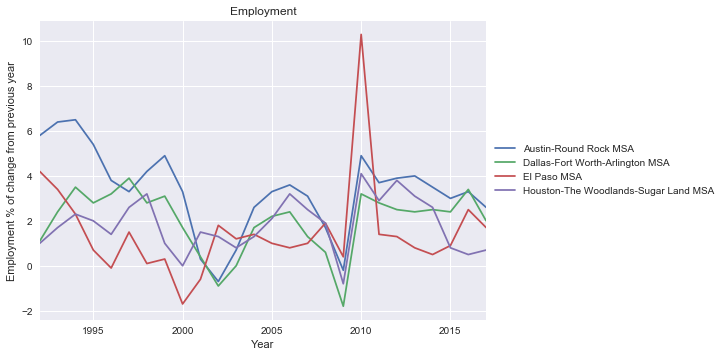

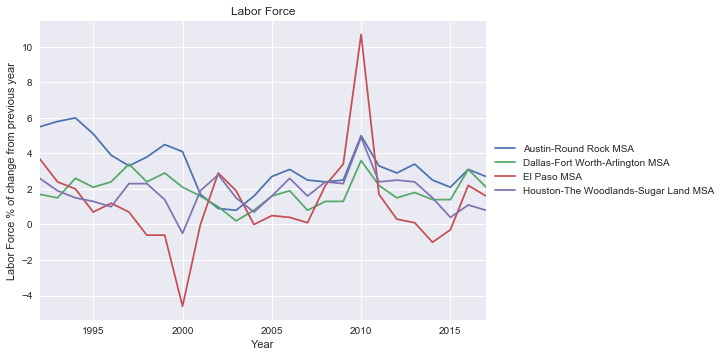

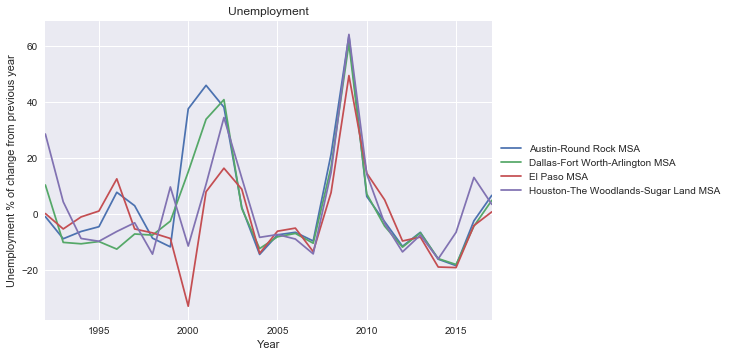

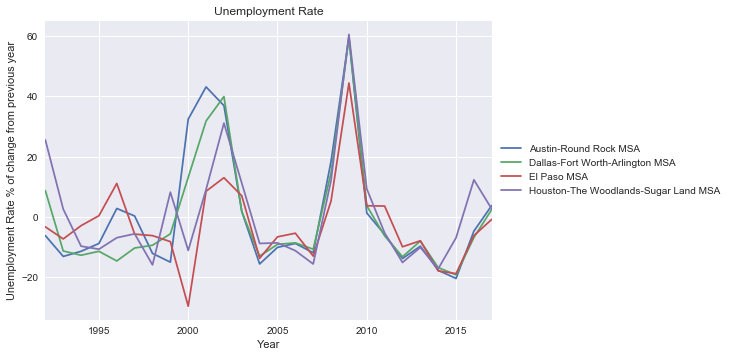

In [33]:
for data in TexasWFC_data:
    TexasWFC_plot=TexasWFC_means_change.reset_index()
    TexasWFC_plot=TexasWFC_plot[TexasWFC_plot.Year>1991]
    #TexasWFC_plot=TexasWFC_plot[data]
    data_df=TexasWFC_plot.pivot(index='Year', columns='Area', values=data)
    data_df=data_df[select]
    ax=data_df.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel(f'{data} % of change from previous year')
    plt.savefig(f'TexasWFC Change % {data}')
    plt.title(f'{data}')
    
    plt.show()

In [34]:
TexasWFC_plot

,Area,Year,Employment,Labor Force,Unemployment,Unemployment Rate
1,Abilene MSA,1992,2.2,2.4,6.5,3.9
2,Abilene MSA,1993,2.5,2.4,-0.2,-2.6
3,Abilene MSA,1994,2.2,1.7,-6.9,-8.3
4,Abilene MSA,1995,3.1,3.0,1.4,-1.9
5,Abilene MSA,1996,1.3,1.1,-3.5,-4.3
6,Abilene MSA,1997,0.3,-0.5,-17.0,-16.6
7,Abilene MSA,1998,0.5,0.3,-5.4,-5.6
8,Abilene MSA,1999,-1.5,-1.3,2.5,3.9
9,Abilene MSA,2000,-0.9,-0.5,8.5,8.8
10,Abilene MSA,2001,-0.5,-0.1,8.1,8.5


# Rent

In [35]:
rent=pd.read_csv('CSV Files/Zillow CSV/Rent.csv').iloc[1:]
sale=pd.read_csv('CSV Files/Zillow CSV/Price.csv').iloc[1:]

In [36]:
rent['State']=rent['RegionName']
sale['State']=sale['RegionName']

In [37]:
rent.head()

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2418,2414,2407,2402,2404,2409,2411,2411,2417,"New York, NY"
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2275.0,2269.0,2268.0,2268.0,2268.0,2271.0,2272.0,...,2766,2771,2778,2790,2804,2816,2824,2830,2834,"Los Angeles-Long Beach-Anaheim, CA"
3,394463,"Chicago, IL",3,1571.0,1565.0,1564.0,1560.0,1554.0,1547.0,1539.0,...,1669,1670,1676,1685,1691,1695,1695,1697,1700,"Chicago, IL"
4,394514,"Dallas-Fort Worth, TX",4,1295.0,1299.0,1303.0,1307.0,1308.0,1309.0,1309.0,...,1597,1600,1600,1600,1602,1607,1614,1619,1623,"Dallas-Fort Worth, TX"
5,394974,"Philadelphia, PA",5,1551.0,1564.0,1574.0,1583.0,1584.0,1585.0,1583.0,...,1688,1685,1683,1683,1688,1695,1700,1703,1702,"Philadelphia, PA"


In [38]:
sale.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,432500.0,439999.0,449000.0,458894.0,459900.0,459000.0,449869.0,450000.0,459000.0,"New York, NY"
2,"Los Angeles, CA",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,640000.0,650000.0,672245.0,679000.0,670000.0,675000.0,675000.0,675000.0,670000.0,"Los Angeles, CA"
3,"Chicago, IL",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249900.0,259500.0,265000.0,269000.0,269900.0,269000.0,262000.0,260000.0,259900.0,"Chicago, IL"
4,"Dallas, TX",4,164900.0,164900.0,165000.0,166000.0,165000.0,165332.5,164900.0,165000.0,...,300482.5,312500.0,319000.0,320000.0,320000.0,319328.0,315000.0,319000.0,318815.0,"Dallas, TX"
5,"Philadelphia, PA",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205800.0,219900.0,229900.0,235000.0,235000.0,235000.0,229900.0,231900.0,235000.0,"Philadelphia, PA"


In [39]:
RegionName_rent=rent.RegionName.tolist()
state_rent=[i.split(',')[-1] for i in RegionName_rent]

RegionName_sale=sale.RegionName.tolist()
state_sale=[i.split(',')[-1] for i in RegionName_sale]

In [40]:
State_Map_rent={}
for i in range(len(RegionName_rent)):
    State_Map_rent[RegionName_rent[i]]=state_rent[i]
    
State_Map_sale={}
for i in range(len(RegionName_sale)):
    State_Map_sale[RegionName_sale[i]]=state_sale[i]

In [41]:
rent['State'] = rent['State'].map(State_Map_rent)
sale['State'] = sale['State'].map(State_Map_sale)

In [42]:
Texas_rent=rent[rent['State'] == ' TX']
Texas_sale=sale[sale['State'] == ' TX']

In [43]:
#QC of Texas Rent 
Texas_rent.head(5)

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
4,394514,"Dallas-Fort Worth, TX",4,1295.0,1299.0,1303.0,1307.0,1308.0,1309.0,1309.0,...,1597,1600,1600,1600,1602,1607,1614,1619,1623,TX
6,394692,"Houston, TX",6,1365.0,1365.0,1366.0,1368.0,1371.0,1373.0,1371.0,...,1564,1562,1561,1558,1555,1554,1554,1555,1557,TX
25,395055,"San Antonio, TX",25,1157.0,1153.0,1153.0,1151.0,1147.0,1140.0,1136.0,...,1335,1337,1339,1340,1340,1339,1338,1340,1341,TX
33,394355,"Austin, TX",33,1306.0,1318.0,1329.0,1341.0,1350.0,1356.0,1359.0,...,1712,1710,1712,1717,1723,1728,1727,1723,1719,TX
65,394561,"El Paso, TX",65,1087.0,1088.0,1087.0,1077.0,1063.0,1052.0,1051.0,...,993,992,991,992,993,995,995,995,996,TX


In [44]:
# QC of Texas Sale 
Texas_sale.head(5)

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,State
4,"Dallas, TX",4,164900.0,164900.0,165000.0,166000.0,165000.0,165332.5,164900.0,165000.0,...,300482.5,312500.0,319000.0,320000.0,320000.0,319328.0,315000.0,319000.0,318815.0,TX
6,"Houston, TX",6,159000.0,159900.0,160000.0,160000.0,159900.0,159900.0,159000.0,159900.0,...,285000.0,289900.0,293990.0,294900.0,293990.0,289900.0,289900.0,289999.0,289900.0,TX
26,"San Antonio, TX",26,159900.0,162500.0,162500.0,163881.0,164900.0,167085.5,165000.0,164436.5,...,259900.0,269000.0,271495.0,270489.5,275000.0,275000.0,274900.0,274900.0,266000.0,TX
35,"Austin, TX",35,204402.0,203450.0,200595.0,204900.0,205000.0,206333.0,200000.0,204900.0,...,330000.0,336777.5,344990.0,345000.0,345000.0,342489.0,339500.0,335900.0,335000.0,TX
68,"El Paso, TX",68,139950.0,140000.0,139800.0,140000.0,142950.0,144694.0,144900.0,143000.0,...,158500.0,159900.0,159900.0,160000.0,161950.0,161500.0,161450.0,161950.0,163000.0,TX


In [45]:
Texas_rent=Texas_rent.drop(['RegionID', 'SizeRank', 'State'], axis=1).set_index('RegionName')

In [46]:
Texas_sale=Texas_sale.drop(['SizeRank', 'State'], axis=1).set_index('RegionName')

In [47]:
Texas_rent.shape, Texas_sale.shape

((48, 84), (61, 94))

In [48]:
Texas_sale.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
RegionName,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",164900.0,164900.0,165000.0,166000.0,165000.0,165332.5,164900.0,165000.0,178900.0,171900.0,...,299900.0,300482.5,312500.0,319000.0,320000.0,320000.0,319328.0,315000.0,319000.0,318815.0
"Houston, TX",159000.0,159900.0,160000.0,160000.0,159900.0,159900.0,159000.0,159900.0,170990.0,169900.0,...,280990.0,285000.0,289900.0,293990.0,294900.0,293990.0,289900.0,289900.0,289999.0,289900.0
"San Antonio, TX",159900.0,162500.0,162500.0,163881.0,164900.0,167085.5,165000.0,164436.5,169150.0,169000.0,...,254900.0,259900.0,269000.0,271495.0,270489.5,275000.0,275000.0,274900.0,274900.0,266000.0
"Austin, TX",204402.0,203450.0,200595.0,204900.0,205000.0,206333.0,200000.0,204900.0,214900.0,210900.0,...,325000.0,330000.0,336777.5,344990.0,345000.0,345000.0,342489.0,339500.0,335900.0,335000.0
"El Paso, TX",139950.0,140000.0,139800.0,140000.0,142950.0,144694.0,144900.0,143000.0,142950.0,141900.0,...,158000.0,158500.0,159900.0,159900.0,160000.0,161950.0,161500.0,161450.0,161950.0,163000.0


In [49]:
Texas_rent=Texas_rent.T.reset_index().rename(columns = {'index':'Year_month'})
Texas_sale=Texas_sale.T.reset_index().rename(columns = {'index':'Year_month'})

In [50]:
Texas_sale.head()

RegionName,Year_month,"Dallas, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","Edinburg, TX","Corpus Christi, TX","Brownsville, TX","Killeen, TX",...,"Uvalde, TX","Fredericksburg, TX","Levelland, TX","Pampa, TX","Borger, TX","Port Lavaca, TX","Snyder, TX","Sweetwater, TX","Andrews, TX","Lamesa, TX"
0,2010-01,164900.0,159000.0,159900.0,204402.0,139950.0,120000.0,164900.0,172500.0,137900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02,164900.0,159900.0,162500.0,203450.0,140000.0,125000.0,164500.0,174700.0,138800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03,165000.0,160000.0,162500.0,200595.0,139800.0,124999.5,164900.0,172250.0,139400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04,166000.0,160000.0,163881.0,204900.0,140000.0,127000.0,164100.0,169900.0,139900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05,165000.0,159900.0,164900.0,205000.0,142950.0,119900.0,164900.0,174500.0,138000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
Texas_rent['Month']=Texas_rent['Year_month']
Texas_rent['Year']=Texas_rent['Year_month']

Texas_sale['Month']=Texas_sale['Year_month']
Texas_sale['Year']=Texas_sale['Year_month']

In [53]:
Texas_rent.head()

RegionName,Year_month,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX","Corpus Christi, TX","Brownsville, TX","Killeen, TX",...,"Fredericksburg, TX","Pampa, TX","Dumas, TX","Snyder, TX","Sweetwater, TX","Andrews, TX","Pecos, TX","Vernon, TX",Month,Year
0,2010-11,1295.0,1365.0,1157.0,1306.0,1087.0,1010.0,1158.0,940.0,1099.0,...,NaN,952.0,948.0,905.0,960.0,1089.0,964.0,1006.0,2010-11,2010-11
1,2010-12,1299.0,1365.0,1153.0,1318.0,1088.0,1003.0,1161.0,936.0,1102.0,...,NaN,960.0,944.0,911.0,966.0,1091.0,967.0,1006.0,2010-12,2010-12
2,2011-01,1303.0,1366.0,1153.0,1329.0,1087.0,1007.0,1156.0,937.0,1083.0,...,NaN,962.0,929.0,905.0,982.0,1091.0,969.0,1011.0,2011-01,2011-01
3,2011-02,1307.0,1368.0,1151.0,1341.0,1077.0,1004.0,1152.0,933.0,1058.0,...,NaN,973.0,926.0,906.0,994.0,1099.0,977.0,1016.0,2011-02,2011-02
4,2011-03,1308.0,1371.0,1147.0,1350.0,1063.0,996.0,1143.0,936.0,1028.0,...,NaN,984.0,926.0,909.0,996.0,1104.0,975.0,1026.0,2011-03,2011-03


In [54]:
Texas_rent.tail()

RegionName,Year_month,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX","Corpus Christi, TX","Brownsville, TX","Killeen, TX",...,"Fredericksburg, TX","Pampa, TX","Dumas, TX","Snyder, TX","Sweetwater, TX","Andrews, TX","Pecos, TX","Vernon, TX",Month,Year
79,2017-06,1602.0,1555.0,1340.0,1723.0,993.0,1034.0,1339.0,903.0,1033.0,...,1710.0,1030.0,1048.0,1036.0,995.0,1273.0,968.0,1044.0,2017-06,2017-06
80,2017-07,1607.0,1554.0,1339.0,1728.0,995.0,1023.0,1341.0,907.0,1036.0,...,1714.0,1026.0,1044.0,1036.0,993.0,1275.0,969.0,1051.0,2017-07,2017-07
81,2017-08,1614.0,1554.0,1338.0,1727.0,995.0,1011.0,1343.0,911.0,1039.0,...,1717.0,1028.0,1048.0,1032.0,992.0,1277.0,974.0,1059.0,2017-08,2017-08
82,2017-09,1619.0,1555.0,1340.0,1723.0,995.0,1003.0,1344.0,919.0,1042.0,...,1717.0,1024.0,1052.0,1027.0,982.0,1276.0,973.0,1056.0,2017-09,2017-09
83,2017-10,1623.0,1557.0,1341.0,1719.0,996.0,998.0,1342.0,925.0,1045.0,...,1717.0,1021.0,1052.0,1022.0,973.0,1280.0,971.0,1045.0,2017-10,2017-10


In [55]:
Rent_Year_Month=Texas_rent.Month.tolist()
Rent_Month=[i.split('-')[-1] for i in Rent_Year_Month]
Rent_Year=[i.split('-')[0] for i in Rent_Year_Month]


In [56]:
State_Map_Rent_Month={}
for i in range(len(Rent_Month)):
    State_Map_Rent_Month[Rent_Year_Month[i]]=Rent_Month[i]
    
State_Map_Rent_Year={}
for i in range(len(Rent_Year)):
    State_Map_Rent_Year[Rent_Year_Month[i]]=Rent_Year[i]

In [57]:
Sale_Year_Month=Texas_sale.Month.tolist()
Sale_Month=[i.split('-')[-1] for i in Sale_Year_Month]
Sale_Year=[i.split('-')[0] for i in Sale_Year_Month]

In [58]:
State_Map_Sale_Month={}
for i in range(len(Sale_Month)):
    State_Map_Sale_Month[Sale_Year_Month[i]]=Sale_Month[i]
    
State_Map_Sale_Year={}
for i in range(len(Sale_Year)):
    State_Map_Sale_Year[Sale_Year_Month[i]]=Sale_Year[i]

In [59]:
Texas_rent.head()

RegionName,Year_month,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX","Corpus Christi, TX","Brownsville, TX","Killeen, TX",...,"Fredericksburg, TX","Pampa, TX","Dumas, TX","Snyder, TX","Sweetwater, TX","Andrews, TX","Pecos, TX","Vernon, TX",Month,Year
0,2010-11,1295.0,1365.0,1157.0,1306.0,1087.0,1010.0,1158.0,940.0,1099.0,...,NaN,952.0,948.0,905.0,960.0,1089.0,964.0,1006.0,2010-11,2010-11
1,2010-12,1299.0,1365.0,1153.0,1318.0,1088.0,1003.0,1161.0,936.0,1102.0,...,NaN,960.0,944.0,911.0,966.0,1091.0,967.0,1006.0,2010-12,2010-12
2,2011-01,1303.0,1366.0,1153.0,1329.0,1087.0,1007.0,1156.0,937.0,1083.0,...,NaN,962.0,929.0,905.0,982.0,1091.0,969.0,1011.0,2011-01,2011-01
3,2011-02,1307.0,1368.0,1151.0,1341.0,1077.0,1004.0,1152.0,933.0,1058.0,...,NaN,973.0,926.0,906.0,994.0,1099.0,977.0,1016.0,2011-02,2011-02
4,2011-03,1308.0,1371.0,1147.0,1350.0,1063.0,996.0,1143.0,936.0,1028.0,...,NaN,984.0,926.0,909.0,996.0,1104.0,975.0,1026.0,2011-03,2011-03


In [60]:
Texas_rent['Month'] = Texas_rent['Month'].map(State_Map_Rent_Month)
Texas_rent['Year'] = Texas_rent['Year'].map(State_Map_Rent_Year)

In [61]:
Texas_rent.drop('Year_month', axis=1, inplace=True)

In [62]:
Texas_sale['Month'] = Texas_sale['Month'].map(State_Map_Sale_Month)
Texas_sale['Year'] = Texas_sale['Year'].map(State_Map_Sale_Year)

In [63]:
Texas_sale.drop('Year_month', axis=1, inplace=True)

In [64]:
Texas_sale.head()

RegionName,"Dallas, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","Edinburg, TX","Corpus Christi, TX","Brownsville, TX","Killeen, TX","Beaumont, TX",...,"Levelland, TX","Pampa, TX","Borger, TX","Port Lavaca, TX","Snyder, TX","Sweetwater, TX","Andrews, TX","Lamesa, TX",Month,Year
0,164900.0,159000.0,159900.0,204402.0,139950.0,120000.0,164900.0,172500.0,137900.0,139900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,2010
1,164900.0,159900.0,162500.0,203450.0,140000.0,125000.0,164500.0,174700.0,138800.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,2010
2,165000.0,160000.0,162500.0,200595.0,139800.0,124999.5,164900.0,172250.0,139400.0,133632.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,2010
3,166000.0,160000.0,163881.0,204900.0,140000.0,127000.0,164100.0,169900.0,139900.0,134900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04,2010
4,165000.0,159900.0,164900.0,205000.0,142950.0,119900.0,164900.0,174500.0,138000.0,134900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05,2010


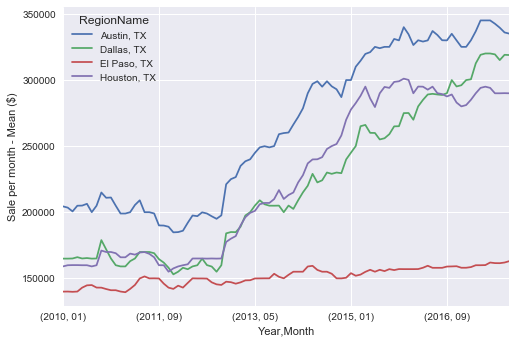

In [68]:
select1=['Austin, TX', 'Dallas, TX', 'El Paso, TX', 'Houston, TX']



Texas_sale.set_index(['Year', 'Month'])[select1].plot()
plt.ylabel('Sale per month - Mean ($)')
plt.savefig('Sale Year Month')
plt.show()

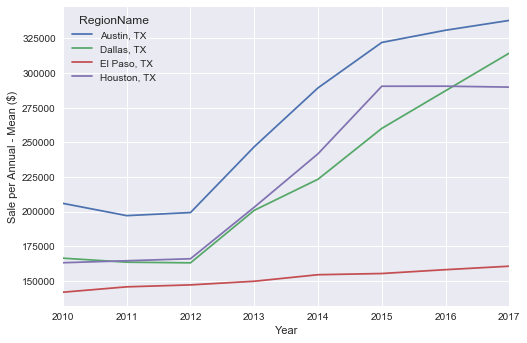

In [69]:
Texas_sale.groupby('Year').mean()[select1].plot()
plt.ylabel('Sale per Annual - Mean ($)')
plt.savefig('Sale Year')
plt.show()

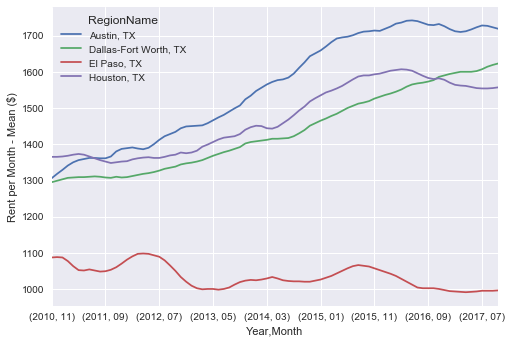

In [70]:
select2=['Austin, TX', 'Dallas-Fort Worth, TX', 'El Paso, TX', 'Houston, TX']
Texas_rent.set_index(['Year', 'Month'])[select2].plot()
plt.ylabel('Rent per Month - Mean ($)')
plt.savefig('Rent Year Month')
plt.show()

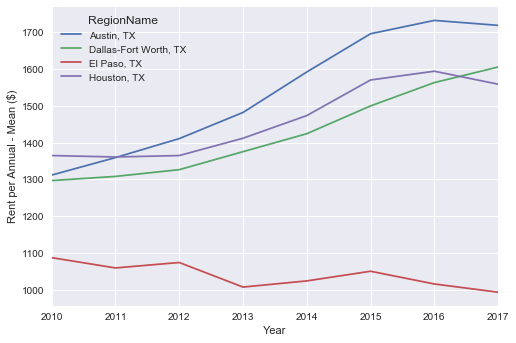

In [71]:
Texas_rent.groupby('Year').mean()[select2].plot()
plt.ylabel('Rent per Annual - Mean ($)')
plt.savefig('Rent Year')
plt.show()

In [72]:
Texas_rent_m=Texas_rent.groupby('Year').mean()[select2]
Texas_sale_m=Texas_sale.groupby('Year').mean()[select1]

In [73]:
Texas_rent_m.columns = ['Austin', 'Dallas', 'El Paso', 'Houston']
Texas_sale_m.columns = ['Austin', 'Dallas', 'El Paso', 'Houston']
Texas_rent_m

,Austin,Dallas,El Paso,Houston
Year,,,,
2010,1312.000000,1297.000000,1087.500000,1365.000000
2011,1359.500000,1308.333333,1059.583333,1361.166667
2012,1411.083333,1326.666667,1074.333333,1365.000000
2013,1482.166667,1375.583333,1007.583333,1412.083333
2014,1592.166667,1424.416667,1024.333333,1473.666667
2015,1696.083333,1499.916667,1050.583333,1570.416667
2016,1732.333333,1563.333333,1016.000000,1594.250000
2017,1718.900000,1605.600000,993.600000,1559.000000


In [74]:
Texas_rent_m=Texas_rent_m.loc[:'2015']
Texas_rent_m

,Austin,Dallas,El Paso,Houston
Year,,,,
2010,1312.000000,1297.000000,1087.500000,1365.000000
2011,1359.500000,1308.333333,1059.583333,1361.166667
2012,1411.083333,1326.666667,1074.333333,1365.000000
2013,1482.166667,1375.583333,1007.583333,1412.083333
2014,1592.166667,1424.416667,1024.333333,1473.666667
2015,1696.083333,1499.916667,1050.583333,1570.416667


In [75]:
Texas_sale_m=Texas_sale_m.loc[:'2015']
Texas_sale_m

,Austin,Dallas,El Paso,Houston
Year,,,,
2010,205948.750000,166394.375000,141845.333333,163115.000000
2011,197095.750000,163507.500000,145720.375000,164537.833333
2012,199326.583333,163038.541667,147125.083333,165983.625000
2013,246825.083333,200935.000000,149750.833333,203184.750000
2014,289297.958333,223374.416667,154466.583333,241755.166667
2015,322068.333333,260048.333333,155337.291667,290468.458333


,Austin,Dallas,El Paso,Houston
Year,,,,
2010,40078,40613,28074,44498
2011,42948,44378,29329,47498
2012,45943,46281,30281,51633
2013,46241,46615,29701,50910
2014,49001,49362,31081,53660
2015,51014,51099,32598,54346


In [76]:
Texas_sale_m = Texas_sale_m.unstack().reset_index()
Texas_sale_m.columns=['City', 'Year', 'Sale']
Texas_sale_m

,City,Year,Sale
0,Austin,2010,205948.750000
1,Austin,2011,197095.750000
2,Austin,2012,199326.583333
3,Austin,2013,246825.083333
4,Austin,2014,289297.958333
5,Austin,2015,322068.333333
6,Dallas,2010,166394.375000
7,Dallas,2011,163507.500000
8,Dallas,2012,163038.541667
9,Dallas,2013,200935.000000


In [77]:
Texas_rent_m = Texas_rent_m.unstack().reset_index()
Texas_rent_m.columns=['City', 'Year', 'Rent']
Texas_rent_m

,City,Year,Rent
0,Austin,2010,1312.000000
1,Austin,2011,1359.500000
2,Austin,2012,1411.083333
3,Austin,2013,1482.166667
4,Austin,2014,1592.166667
5,Austin,2015,1696.083333
6,Dallas,2010,1297.000000
7,Dallas,2011,1308.333333
8,Dallas,2012,1326.666667
9,Dallas,2013,1375.583333


In [78]:
Texas_select_real_state=pd.merge(Texas_rent_m, Texas_sale_m, on=['City', 'Year'])
Texas_select_real_state

,City,Year,Rent,Sale
0,Austin,2010,1312.000000,205948.750000
1,Austin,2011,1359.500000,197095.750000
2,Austin,2012,1411.083333,199326.583333
3,Austin,2013,1482.166667,246825.083333
4,Austin,2014,1592.166667,289297.958333
5,Austin,2015,1696.083333,322068.333333
6,Dallas,2010,1297.000000,166394.375000
7,Dallas,2011,1308.333333,163507.500000
8,Dallas,2012,1326.666667,163038.541667
9,Dallas,2013,1375.583333,200935.000000


In [79]:
income=income.loc[2010:]
income=income.unstack().reset_index()
income.columns = ['City', 'Year', 'Income']

In [80]:
income

,City,Year,Income
0,Austin,2010,40078
1,Austin,2011,42948
2,Austin,2012,45943
3,Austin,2013,46241
4,Austin,2014,49001
5,Austin,2015,51014
6,Dallas,2010,40613
7,Dallas,2011,44378
8,Dallas,2012,46281
9,Dallas,2013,46615


,City,Year,Rent,Sale,Income


In [81]:
income[['Year', 'Income']]=income[['Year', 'Income']].astype(int)
Texas_select_real_state[['Year', 'Rent', 'Sale']]=Texas_select_real_state[['Year', 'Rent', 'Sale']].astype(int)

Texas=pd.merge(Texas_select_real_state,income, on=['City', 'Year'])
Texas.head()



,City,Year,Rent,Sale,Income
0,Austin,2010,1312,205948,40078
1,Austin,2011,1359,197095,42948
2,Austin,2012,1411,199326,45943
3,Austin,2013,1482,246825,46241
4,Austin,2014,1592,289297,49001


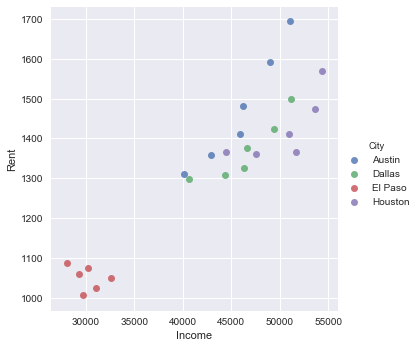

In [83]:
sns.lmplot(x="Income", y="Rent", hue="City", data=Texas, fit_reg=False)
plt.savefig('Income vs Rent')
plt.show()

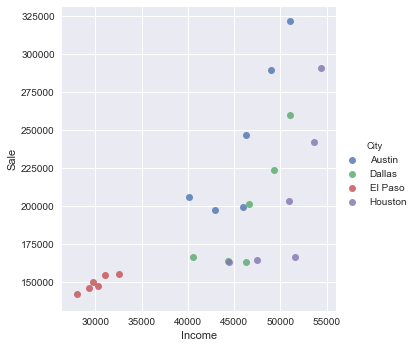

In [84]:
sns.lmplot(x="Income", y="Sale", hue="City", data=Texas, fit_reg=False)
plt.savefig('Income vs Sale')
plt.show()

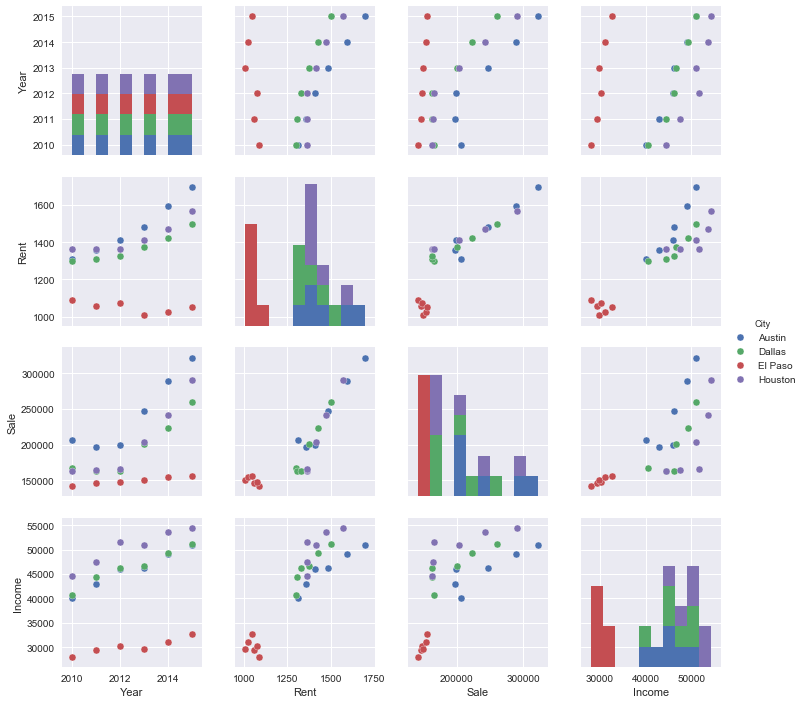

In [85]:
sns.pairplot(Texas, hue="City")

plt.show()


In [86]:
Texas_wsf=TexasWFC_means.reset_index()

In [87]:
Texas_wsf=Texas_wsf[Texas_wsf['Year'].between(2010,2015)]

In [88]:
select={'Austin-Round Rock MSA':'Austin',
        'Dallas-Fort Worth-Arlington MSA' : 'Dallas',
        'Houston-The Woodlands-Sugar Land MSA' : 'Houston',
        'El Paso MSA' : 'El Paso'
       }

In [89]:
Texas_wsf.Area = Texas_wsf.Area.map(select)

In [90]:
Texas_WF=Texas_wsf[Texas_wsf['Area'].isin(['Austin','Houston','Dallas','El Paso'])]

In [91]:

Texas_WF.rename(columns={'Area':'City'}, inplace=True)

C:\Users\aerwe\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [92]:
Texas_WF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 76 to 277
Data columns (total 6 columns):
City                 24 non-null object
Year                 24 non-null int64
Employment           24 non-null float64
Labor Force          24 non-null float64
Unemployment         24 non-null float64
Unemployment Rate    24 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ KB


In [93]:
Texas=pd.merge(Texas, Texas_WF, on = ['City', 'Year'])

In [98]:
Texas.to_csv('Texas_select.csv')

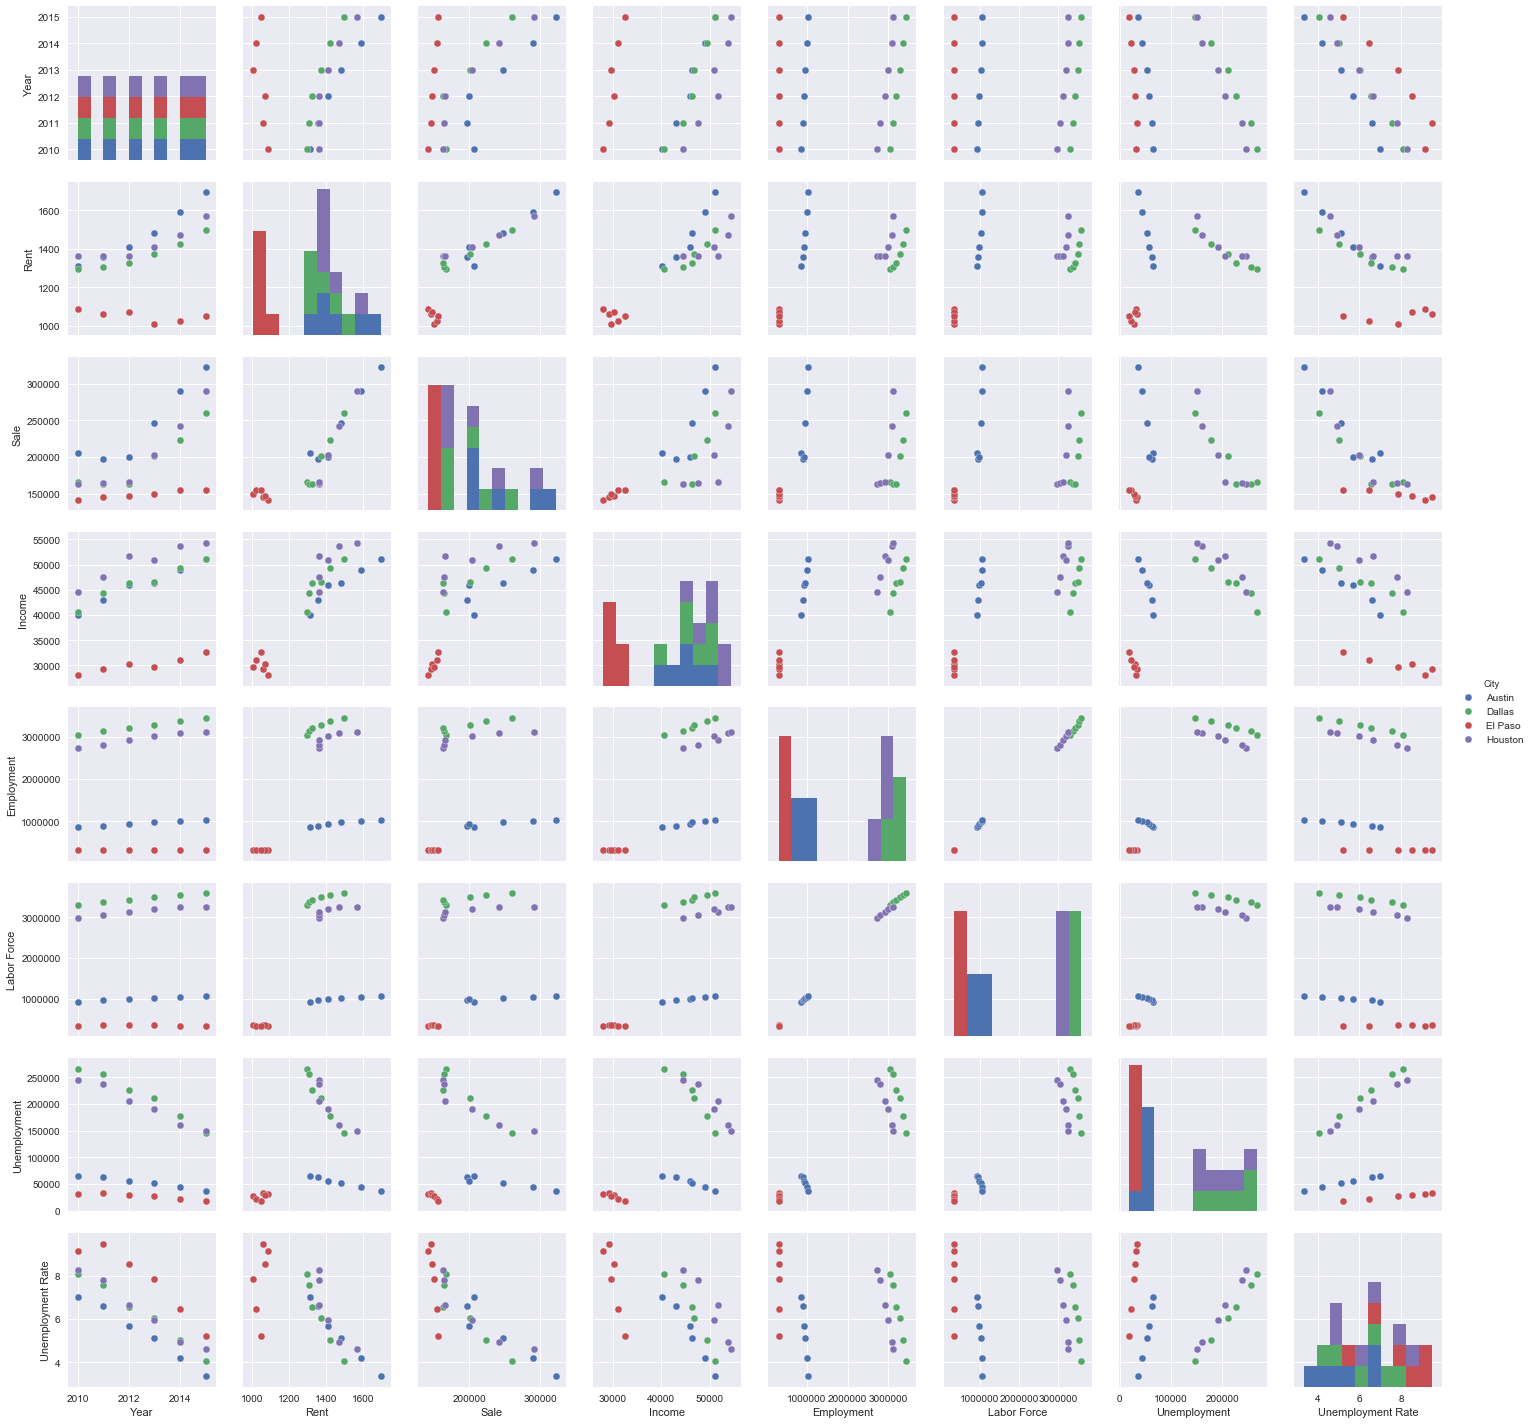

In [99]:
sns.pairplot(Texas, hue="City")
plt.savefig('Texas_select_pair_plot')
plt.show()